<a href="https://colab.research.google.com/github/martinpdab/tugasscdl/blob/main/skenario5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sklearn

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split
from keras.utils.np_utils import to_categorical

try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
#memakai dataset
URL = 'https://raw.githubusercontent.com/martinpdab/tugasscdl/main/data%20fix.csv' 
dataframe = pd.read_csv(URL)
dataframe

,Period,TE,HU,RF,WS,PD,ABJ,LAG 0,LAG 1,LAG 2,LAG 3,LAG 4,LAG 5,LAG 6,LAG 7,LAG 8,LAG 9,LAG 10,LAG 11,LAG 12,OS
0,Jan-10,26.02,84.74,10.52,0.84,792.86,86.96,1,4,6,4,4,1,4,3,3,5,2,1,4,0
1,Feb-10,26.32,84.64,12.04,0.86,793.45,86.72,3,1,4,6,4,4,1,4,3,3,5,2,1,1
2,Mar-10,26.39,85.00,8.65,0.55,794.04,86.50,0,3,1,4,6,4,4,1,4,3,3,5,2,0
3,Apr-10,26.29,86.17,10.37,0.30,794.63,86.28,1,0,3,1,4,6,4,4,1,4,3,3,5,0
4,May-10,26.57,85.61,7.35,0.58,795.22,86.08,0,1,0,3,1,4,6,4,4,1,4,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,Aug-18,24.27,76.87,0.00,1.39,846.18,96.29,1,4,3,3,5,2,1,4,1,1,1,2,3,0
104,Sep-18,25.50,75.73,0.59,1.03,846.59,93.34,4,1,4,3,3,5,2,1,4,1,1,1,2,1
105,Oct-18,26.58,74.94,0.04,1.39,847.01,96.10,4,4,1,4,3,3,5,2,1,4,1,1,1,1
106,Nov-18,26.49,82.28,10.53,1.00,847.42,96.38,6,4,4,1,4,3,3,5,2,1,4,1,1,1


In [11]:
#mengambil kolom period, rf, dan os serta mengacak dataset
data = dataframe[['Period', 'RF', 'OS']]
data = shuffle(data)
data.head()

,Period,RF,OS
96,Jan-18,9.83,1
97,Feb-18,13.44,0
46,Nov-13,9.20,0
36,Jan-13,15.03,0
91,Aug-17,0.40,0


In [13]:
#train-test split 80-20
train, test = train_test_split(data, test_size=0.2)
print(len(train), 'banyak data train')
print(len(test), 'banyak data test')

#train-test split 70-30
#train, test = train_test_split(data, test_size=0.3)
#print(len(train), 'banyak data train')
#print(len(test), 'banyak data test')

86 banyak data train
22 banyak data test


In [16]:
data.describe()

,RF,OS
count,108.000000,108.000000
mean,8.011878,0.268519
std,5.812471,0.445255
min,0.000000,0.000000
25%,2.830000,0.000000
50%,8.410000,0.000000
75%,11.920000,1.000000
max,26.540000,1.000000


In [17]:
data.isnull().sum()

Period    0
RF        0
OS        0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


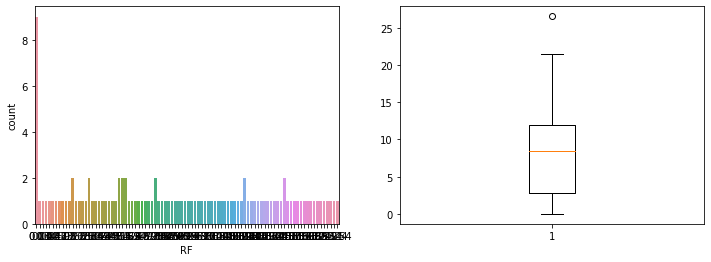

In [23]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(data['RF'])
f.add_subplot(1,2,2)
plt.boxplot(data['RF'])
plt.show()

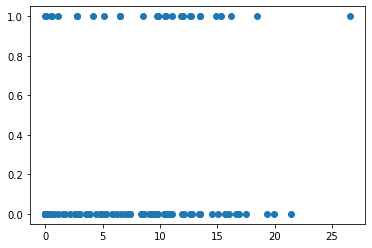

In [26]:
plt.scatter(data['RF'], data['OS'])
plt.show()